In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Normalize the data using StandardScaler
scaler = StandardScaler()
df_market_data_normalized = scaler.fit_transform(df_market_data)


In [6]:
# Create a DataFrame with the scaled data
# Convert the normalized data back to a DataFrame
df_market_data_normalized = pd.DataFrame(df_market_data_normalized, columns=df_market_data.columns, index=df_market_data.index)

# Copy the crypto names from the index (since 'coin_id' is now the index)
crypto_names = df_market_data.index

# Copy the crypto names from the original data
crypto_names = df_market_data.index

# Set the coinid column as index
#df_market_data.set_index('coin_id', inplace=True)

# Display sample data
print(df_market_data.head(10))

                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                              1.08388                     7.60278   
ethereum                             0.22392                    10.38134   
tether                              -0.21173                     0.04935   
ripple                              -0.37819                    -0.60926   
bitcoin-cash                         2.90585                    17.09717   
binancecoin                          2.10423                    12.85511   
chainlink                           -0.23935                    20.69459   
cardano                              0.00322                    13.99302   
litecoin                            -0.06341                     6.60221   
bitcoin-cash-sv                      0.92530                     3.29641   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

In [7]:
print(df_market_data.columns)

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


---

### Find the Best Value for k Using the Original Data.

In [8]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [9]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=42)
# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans_model.fit(df_market_data_normalized)
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

C:\Users\secar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\secar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\secar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\secar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [10]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia_values': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

print(elbow_df)

    k_values  inertia_values
0          1      287.000000
1          2      195.820218
2          3      123.190482
3          4       79.022435
4          5       65.220364
5          6       52.829819
6          7       43.786435
7          8       37.527740
8          9       33.070926
9         10       28.989073
10        11       24.532527


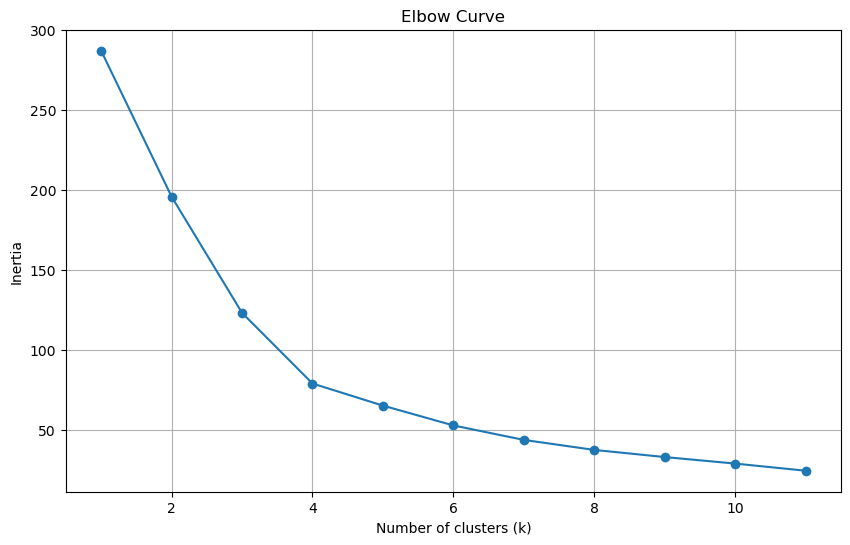

In [11]:
import matplotlib.pyplot as plt
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [12]:
# Initialize the K-Means model using the best value for k
best_k = 4

kmeans_model = KMeans(n_clusters=best_k, random_state=42)

In [13]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_market_data_normalized)

C:\Users\secar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\secar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(df_market_data_normalized)

# Print the resulting array of cluster values.
print(cluster_labels)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [15]:
# Create a copy of the DataFrame
df_copy = df_market_data

In [16]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data['predicted_cluster'] = cluster_labels

# Display sample data
print(df_market_data.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [17]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_market_data.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="predicted_cluster",  # Color points by predicted clusters
    hover_cols=["coin_name"],  # Include cryptocurrency name in hover information
    cmap="Category10",  # Color map for the clusters
    title="Price Change (24h) vs Price Change (7d) Scatter Plot"
)
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [19]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_transformed = pca_model.fit_transform(df_market_data_normalized)

df_pca_transformed = pd.DataFrame(
    pca_transformed,
    columns=['PC1', 'PC2', 'PC3'],  # Set column names for the principal components
    index=df_market_data.index  # Set the same index as the original DataFrame
)
# View the first five rows of the DataFrame. 
print(df_pca_transformed.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [20]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

# Print the explained variance for each principal component
for i, var in enumerate(explained_variance):
    print(f"Explained variance for PC{i+1}: {var:.4f}")

Explained variance for PC1: 0.3720
Explained variance for PC2: 0.3470
Explained variance for PC3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is the sum of these variances, which is 0.8950. 
You can arrive at the same answer by using the explained variance ratio

In [21]:
#The total explained variance of the three principal components is the sum of these variances, which is 0.8950. 
#You can arrive at the same answer by using the explained variance ratio

In [22]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(
    pca_transformed,
    columns=['PC1', 'PC2', 'PC3'],  # Column names for the principal components
    index=df_market_data.index  # Set the same index as the original DataFrame
)
# Creating a DataFrame with the PCA data
crypto_names = df_market_data.index
# Copy the crypto names from the original data
#set the coinid column as index
#df_market_data.set_index('coin_id', inplace=True)

# Set the coinid column as index


# Display sample data
print(df_market_data.head(10))

                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                              1.08388                     7.60278   
ethereum                             0.22392                    10.38134   
tether                              -0.21173                     0.04935   
ripple                              -0.37819                    -0.60926   
bitcoin-cash                         2.90585                    17.09717   
binancecoin                          2.10423                    12.85511   
chainlink                           -0.23935                    20.69459   
cardano                              0.00322                    13.99302   
litecoin                            -0.06341                     6.60221   
bitcoin-cash-sv                      0.92530                     3.29641   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

---

### Find the Best Value for k Using the PCA Data

In [23]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [24]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
     kmeans_model = KMeans(n_clusters=k, random_state=42)
# 2. Fit the model to the data using `df_market_data_pca`
     kmeans_model.fit(df_pca)
# 3. Append the model.inertia_ to the inertia list
     inertia_values.append(kmeans_model.inertia_)

C:\Users\secar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\secar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\secar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\secar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [25]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data2 = {'k_values': k_values, 'inertia_values': inertia_values}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df2 = pd.DataFrame(elbow_data2)

print(elbow_df2)

    k_values  inertia_values
0          1      256.874086
1          2      168.811896
2          3       93.774626
3          4       49.665497
4          5       37.878747
5          6       27.618972
6          7       21.182776
7          8       17.091637
8          9       13.667065
9         10       10.559358
10        11        8.177490


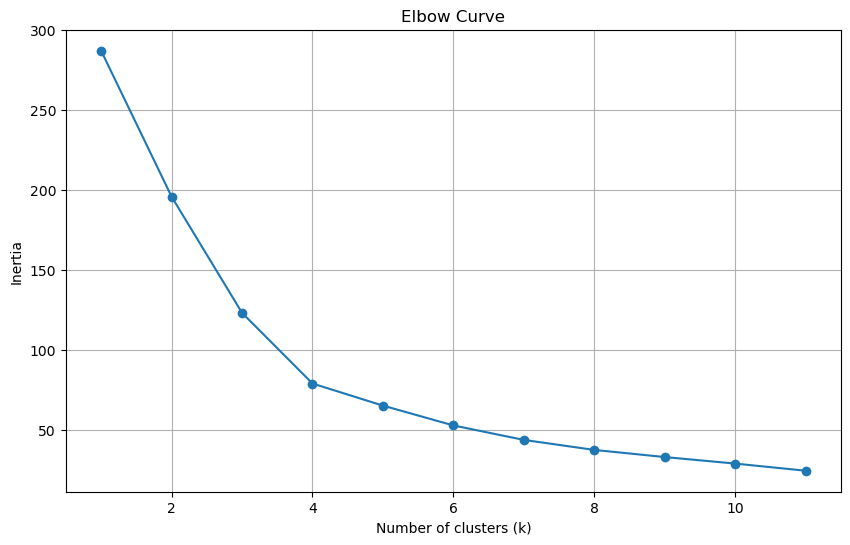

In [26]:
import matplotlib.pyplot as plt
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df2['k_values'], elbow_df['inertia_values'], marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [32]:
# Initialize the K-Means model using the best value for k
best_k = 4

kmeans_nextmodel = KMeans(n_clusters=best_k, random_state=42)

In [33]:
# Fit the K-Means model using the PCA data
kmeans_nextmodel.fit(df_pca)

C:\Users\secar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\secar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [34]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels_pca = kmeans_nextmodel.predict(df_pca)
# Print the resulting array of cluster values.
print(cluster_labels_pca)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


In [35]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy2 = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy2['predicted_cluster'] = cluster_labels_pca

# Display sample data
print(df_pca_copy2.head())

                   PC1       PC2       PC3  predicted_cluster
coin_id                                                      
bitcoin      -0.600667  0.842760  0.461595                  3
ethereum     -0.458261  0.458466  0.952877                  3
tether       -0.433070 -0.168126 -0.641752                  0
ripple       -0.471835 -0.222660 -0.479053                  0
bitcoin-cash -1.157800  2.041209  1.859715                  3


In [36]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
nextscatter_plot = df_pca_copy2.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="predicted_cluster",  # Color points by predicted clusters
    hover_cols=["crypto_name"],  # Include cryptocurrency name in hover information
    cmap="Category10",  # Color map for the clusters
    title="Principal Component Analysis (PC1 vs PC2) Scatter Plot"
)
nextscatter_plot

:Scatter   [PC1]   (PC2,predicted_cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

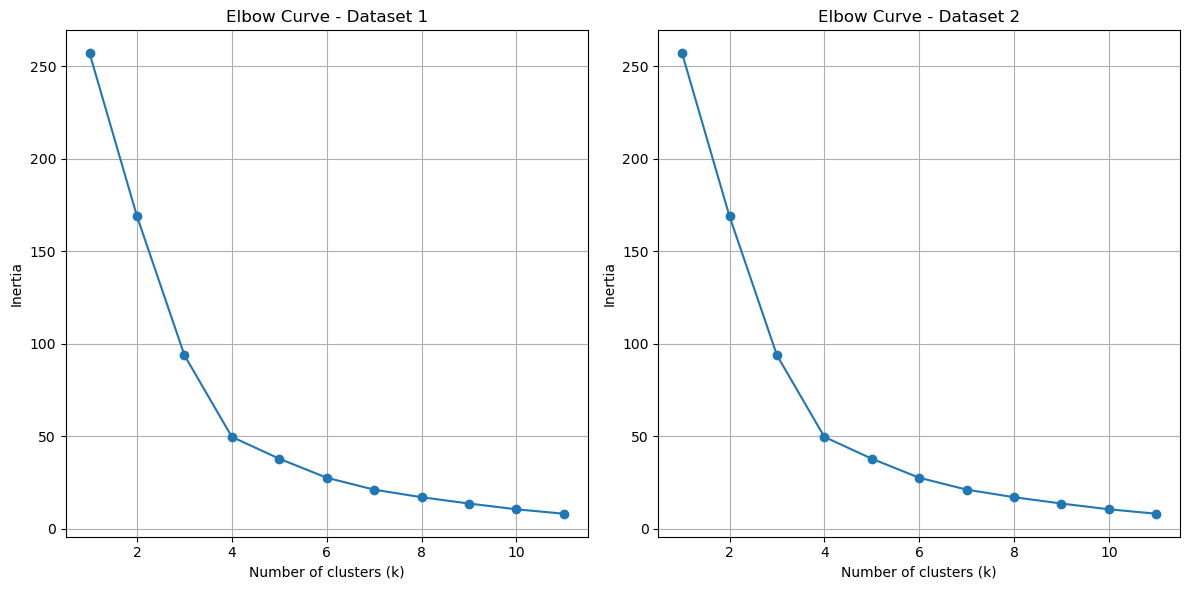

In [65]:
# Composite plot to contrast the Elbow curves
# Create a composite plot to contrast the Elbow curves
plt.figure(figsize=(12, 6))

# Plot Elbow curve for the first set of data
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], marker='o', linestyle='-')
plt.title('Elbow Curve - Dataset 1')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

# Plot Elbow curve for the second set of data
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(elbow_df2['k_values'], elbow_df2['inertia_values'], marker='o', linestyle='-')
plt.title('Elbow Curve - Dataset 2')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Show the composite plot
plt.show()

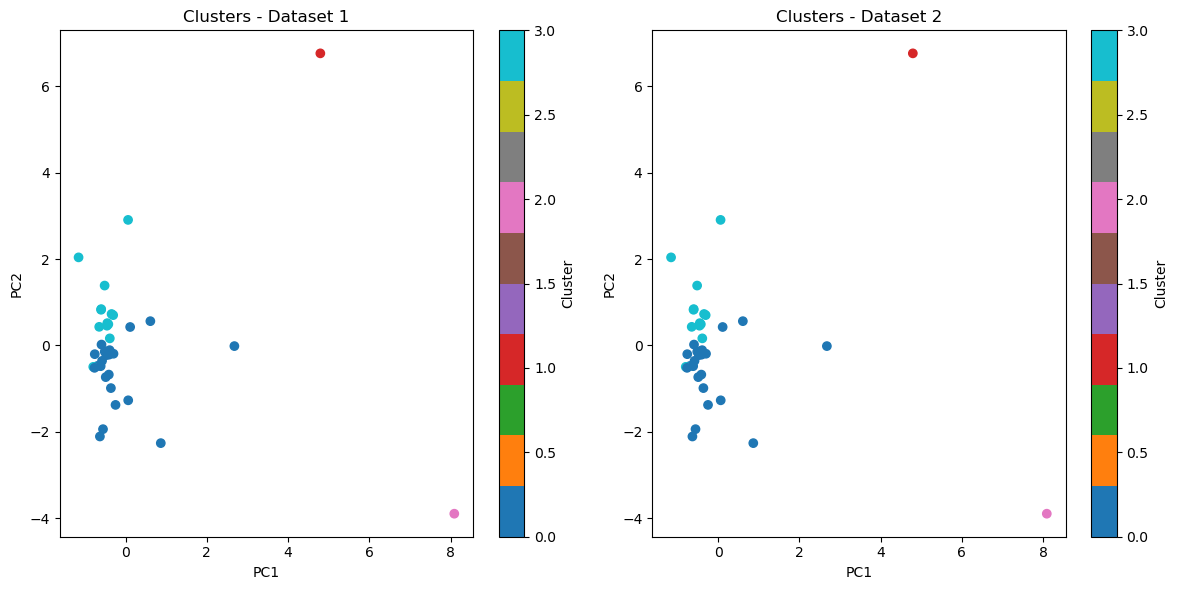

In [72]:
# Composite plot to contrast the clusters
# Create a composite plot to contrast the clusters
plt.figure(figsize=(12, 6))

# Plot clusters for the first dataset
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.scatter(df_pca_copy['PC1'], df_pca_copy['PC2'], c=df_pca_copy['predicted_cluster'], cmap='tab10')
plt.title('Clusters - Dataset 1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')

# Plot clusters for the second dataset
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.scatter(df_pca_copy2['PC1'], df_pca_copy2['PC2'], c=df_pca_copy2['predicted_cluster'], cmap='tab10')
plt.title('Clusters - Dataset 2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')

# Adjust layout
plt.tight_layout()

# Show the composite plot
plt.show()
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Doing this trades accuracy for simplicity for more digestible results. 